### Decision Trees and Random Forests.

- a non-parametric algorithm called *random forests*
- an *ensemble learner* built on decision trees.
    - Random forests are an example of an ensemble method, meaning that it relies on aggregating the results of an ensemble of simpler estimators.
        - a majority vote among a number of estimators can end up being better than any of the individual estimators doing the voting!

*Decision trees* are extremely intuitive ways to classify or label objects: 
- you simply ask a series of questions designed to zero-in on the classification.
- The binary splitting makes this extremely efficient: 
    - in a well-constructed tree, each question will cut the number of options by approximately half, 
    - very quickly narrowing the options even among a large number of classes. 
        - The trick, of course, comes in deciding which questions to ask at each step.


In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

#### Creating a decision tree

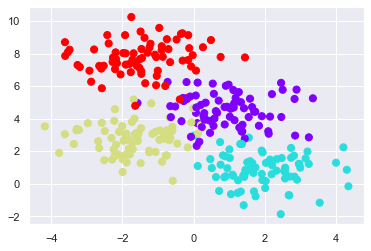

In [15]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=300, centers=4,
                  random_state=0, cluster_std=1.0)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow');

- Except for nodes that contain all of one color, at each level every region is again split along one of the two features.

In [16]:
#in Scikit-Learn with the DecisionTreeClassifier estimator:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier().fit(X, y)

In [17]:
def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
    ax = ax or plt.gca()
    
    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap,
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # fit the estimator
    model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap, clim=(y.min(), y.max()),
                           zorder=1)

    ax.set(xlim=xlim, ylim=ylim)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: UserWarning: The following kwargs were not used by contour: 'clim'


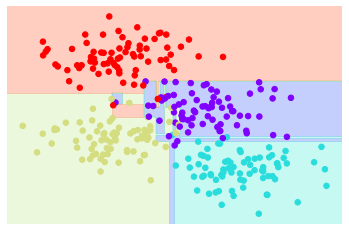

In [18]:
visualize_classifier(DecisionTreeClassifier(), X, y)

In [20]:
# helpers_05_08 is found in the online appendix
import helpers_05_08
helpers_05_08.plot_tree_interactive(X, y);

interactive(children=(Dropdown(description='depth', index=1, options=(1, 5), value=5), Output()), _dom_classes…

*this decision tree, even at only five levels deep, is clearly over-fitting our data.*
- Such over-fitting turns out to be a general property of decision trees: 
    - it is very easy to go too deep in the tree, and thus to fit details of the particular data rather than the overall properties of the distributions they are drawn from.

In [21]:
helpers_05_08.randomized_tree_interactive(X, y)

interactive(children=(Dropdown(description='random_state', options=(0, 100), value=0), Output()), _dom_classes…